In [4]:
import scanpy as sc
import pandas as pd
import decoupler as dc

# Only needed for visualization:
import matplotlib.pyplot as plt
import seaborn as sns

import hdf5plugin

In [18]:
path = "../data/brca/tcga/processed/GSE176078/ct_minor/genes_sce_expr_primary_tumor_unstranded_subset_CID3586.h5ad"
adata = sc.read_h5ad(path)

In [19]:
adata

AnnData object with n_obs × n_vars = 16867 × 16867

In [20]:
model = dc.get_progeny(organism='human', top=100)
model

,source,target,weight,p_value
0,Androgen,TMPRSS2,11.490631,0.000000e+00
1,Androgen,NKX3-1,10.622551,2.242078e-44
2,Androgen,MBOAT2,10.472733,4.624285e-44
3,Androgen,KLK2,10.176186,1.944414e-40
4,Androgen,SARG,11.386852,2.790209e-40
...,...,...,...,...
1395,p53,CCDC150,-3.174527,7.396252e-13
1396,p53,LCE1A,6.154823,8.475458e-13
1397,p53,TREM2,4.101937,9.739648e-13
1398,p53,GDF9,3.355741,1.087433e-12


In [34]:
pd.unique(model.source)

array(['Androgen', 'EGFR', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK',
       'NFkB', 'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'p53'],
      dtype=object)

In [21]:
adata.X

array([[1.4657395e+09, 1.7620417e+09, 1.9067853e+09, ..., 0.0000000e+00,
        0.0000000e+00, 1.6934058e+10],
       [1.5331772e+09, 1.3720659e+09, 1.6414833e+09, ..., 0.0000000e+00,
        0.0000000e+00, 1.4281532e+10],
       [9.3692326e+08, 9.3124032e+08, 9.4045760e+08, ..., 0.0000000e+00,
        0.0000000e+00, 9.8197668e+09],
       ...,
       [3.5704282e+06, 3.5121972e+06, 3.7973430e+06, ..., 0.0000000e+00,
        0.0000000e+00, 3.3119148e+07],
       [2.5612610e+06, 2.6211585e+06, 2.8539438e+06, ..., 0.0000000e+00,
        0.0000000e+00, 2.4971326e+07],
       [5.8997504e+07, 5.7868112e+07, 6.3134380e+07, ..., 0.0000000e+00,
        0.0000000e+00, 4.0881632e+08]], dtype=float32)

In [22]:
dc.run_mlm(mat=adata, net=model, 
           source='source', 
           target='target', 
           weight='weight', 
           use_raw = False,
           verbose=True)


4382 features of mat are empty, they will be removed.
Running mlm on mat with 16867 samples and 12485 targets for 14 sources.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:11<00:00,  5.50s/it]


In [23]:
adata

AnnData object with n_obs × n_vars = 16867 × 16867
    obsm: 'mlm_estimate', 'mlm_pvals'

In [24]:
adata.obsm['mlm_estimate']

,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
TSPAN6,-0.689469,1.259159,-0.916686,-2.203093,-1.833933,-1.593956,1.293153,-0.260977,-0.721408,-2.369139,2.776966,-0.553049,0.195239,-0.212803
DPM1,-0.633197,1.309607,-0.907131,-2.244071,-2.325771,-1.606397,1.186958,-0.290029,-0.737297,-2.340492,2.834721,-0.620903,0.191194,-0.239807
SCYL3,-0.672323,1.377905,-0.930425,-2.045712,-2.016019,-1.560313,1.365894,-0.063814,-0.630803,-2.365623,2.844688,-0.644396,0.097010,-0.384039
C1ORF112,-0.672433,1.441280,-0.858542,-2.209589,-2.285709,-1.693343,1.155277,-0.547036,-0.716493,-2.315735,2.972031,-0.540428,0.323576,-0.062569
FGR,-0.737754,1.175774,-0.945299,-2.299734,-2.796455,-1.676586,0.898326,-0.287500,-0.889601,-2.398176,2.736817,-0.576360,0.019859,-0.388943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LINC01012,-0.588343,1.381474,-0.866177,-2.158160,-2.122820,-1.617227,1.288123,-0.345098,-0.598071,-2.369462,2.949593,-0.533695,0.295525,-0.151864
AC241377.2,-0.674850,1.097181,-0.838424,-2.358309,-2.295437,-1.613083,0.947760,-0.387095,-0.721686,-2.338004,2.725521,-0.530692,0.218491,-0.264136
RP13-465B17.4,-0.601472,1.283583,-0.925490,-2.145484,-1.928823,-1.555607,1.359805,-0.103457,-0.655033,-2.390773,2.912613,-0.674813,0.174181,-0.362793
LINC00891,-0.738127,1.300947,-0.954806,-2.285366,-2.764470,-1.706673,0.988799,-0.288756,-1.091513,-2.346084,2.782387,-0.607017,-0.012640,-0.431854


In [25]:
acts = dc.get_acts(adata, obsm_key='mlm_estimate')
acts

AnnData object with n_obs × n_vars = 16867 × 14
    obsm: 'mlm_estimate', 'mlm_pvals'

In [27]:
acts.obsm['mlm_estimate']

,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
TSPAN6,-0.689469,1.259159,-0.916686,-2.203093,-1.833933,-1.593956,1.293153,-0.260977,-0.721408,-2.369139,2.776966,-0.553049,0.195239,-0.212803
DPM1,-0.633197,1.309607,-0.907131,-2.244071,-2.325771,-1.606397,1.186958,-0.290029,-0.737297,-2.340492,2.834721,-0.620903,0.191194,-0.239807
SCYL3,-0.672323,1.377905,-0.930425,-2.045712,-2.016019,-1.560313,1.365894,-0.063814,-0.630803,-2.365623,2.844688,-0.644396,0.097010,-0.384039
C1ORF112,-0.672433,1.441280,-0.858542,-2.209589,-2.285709,-1.693343,1.155277,-0.547036,-0.716493,-2.315735,2.972031,-0.540428,0.323576,-0.062569
FGR,-0.737754,1.175774,-0.945299,-2.299734,-2.796455,-1.676586,0.898326,-0.287500,-0.889601,-2.398176,2.736817,-0.576360,0.019859,-0.388943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LINC01012,-0.588343,1.381474,-0.866177,-2.158160,-2.122820,-1.617227,1.288123,-0.345098,-0.598071,-2.369462,2.949593,-0.533695,0.295525,-0.151864
AC241377.2,-0.674850,1.097181,-0.838424,-2.358309,-2.295437,-1.613083,0.947760,-0.387095,-0.721686,-2.338004,2.725521,-0.530692,0.218491,-0.264136
RP13-465B17.4,-0.601472,1.283583,-0.925490,-2.145484,-1.928823,-1.555607,1.359805,-0.103457,-0.655033,-2.390773,2.912613,-0.674813,0.174181,-0.362793
LINC00891,-0.738127,1.300947,-0.954806,-2.285366,-2.764470,-1.706673,0.988799,-0.288756,-1.091513,-2.346084,2.782387,-0.607017,-0.012640,-0.431854


In [30]:
pvals = acts.obsm['mlm_pvals']
pvals.head(10)

,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
TSPAN6,0.490541,0.207996,0.359325,0.027606,0.066688,0.110971,0.195982,0.794115,0.470672,0.017845,0.005495,0.580240,0.845209,0.831484
DPM1,0.526617,0.190353,0.364355,0.024845,0.020047,0.108212,0.235267,0.771799,0.460956,0.019274,0.004594,0.534674,0.848376,0.810484
SCYL3,0.501391,0.168257,0.352169,0.040806,0.043819,0.118711,0.171997,0.949119,0.528181,0.018015,0.004453,0.519330,0.922720,0.700956
C1ORF112,0.501321,0.149531,0.390610,0.027152,0.022288,0.090415,0.247999,0.584364,0.473701,0.020589,0.002964,0.588911,0.746264,0.950110
FGR,0.460678,0.239708,0.344524,0.021480,0.005175,0.093649,0.369029,0.773734,0.373697,0.016492,0.006212,0.564382,0.984156,0.697325
CFH,0.431140,0.209696,0.295894,0.024754,0.007391,0.084955,0.338161,0.762928,0.223614,0.020562,0.006523,0.527221,0.950591,0.618833
FUCA2,0.522651,0.226547,0.385374,0.021868,0.017970,0.119662,0.255370,0.767162,0.458928,0.018676,0.006385,0.526455,0.875977,0.788338
GCLC,0.530030,0.151741,0.373744,0.037388,0.031720,0.108639,0.180105,0.904560,0.565136,0.019588,0.004386,0.510231,0.857169,0.708895
NFYA,0.535405,0.171389,0.383462,0.027067,0.033094,0.102759,0.231380,0.673759,0.450082,0.020149,0.004734,0.580887,0.790458,0.880099
STPG1,0.566238,0.197007,0.358485,0.028669,0.038338,0.119774,0.191778,0.911783,0.510987,0.017711,0.004458,0.519984,0.854444,0.739823


In [32]:
pvals.loc[pvals['Androgen'] < 0.05 ]

,Androgen,EGFR,Estrogen,Hypoxia,JAK-STAT,MAPK,NFkB,PI3K,TGFb,TNFa,Trail,VEGF,WNT,p53
MYOM2,0.023471,0.287525,0.550136,0.010319,0.809169,0.176014,0.744611,0.771604,0.104533,0.033375,0.022661,0.632104,0.645419,0.907794
ACSM1,0.036914,0.314640,0.888390,0.022329,0.558973,0.181324,0.591026,0.908747,0.274462,0.042980,0.024489,0.604988,0.732941,0.993972


In [39]:
results = dc.decouple(adata, 
                      model, 
                      use_raw=False, 
                      min_n = 5,
                      verbose=True)

4382 features of mat are empty, they will be removed.
Running mlm on mat with 16867 samples and 12485 targets for 14 sources.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:13<00:00,  6.50s/it]


4382 features of mat are empty, they will be removed.
Running ulm on mat with 16867 samples and 12485 targets for 14 sources.
4382 features of mat are empty, they will be removed.
Running wsum on mat with 16867 samples and 12485 targets for 14 sources.
Infering activities on 2 batches.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [01:58<00:00, 59.25s/it]


In [41]:
print(results)

None


In [42]:
adata

AnnData object with n_obs × n_vars = 16867 × 16867
    obsm: 'mlm_estimate', 'mlm_pvals', 'ulm_estimate', 'ulm_pvals', 'wsum_estimate', 'wsum_norm', 'wsum_corr', 'wsum_pvals', 'consensus_estimate', 'consensus_pvals'

In [47]:
# Extract from dictionary
acts =  adata.obsm['consensus_estimate']
pvals = adata.obsm['consensus_pvals']

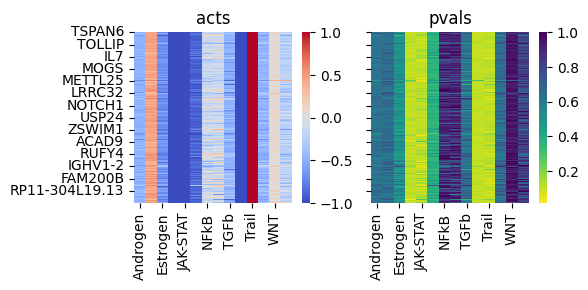

In [48]:
fig, axes = plt.subplots(1,2, figsize=(6,3), tight_layout=True, sharey=True)

axes[0].set_title('acts')
sns.heatmap(acts, cmap='coolwarm', vmin=-1, vmax=1, ax=axes[0])
axes[1].set_title('pvals')
sns.heatmap(pvals, cmap='viridis_r', ax=axes[1], vmax=1)

plt.show()

In [52]:
pvals.columns

Index(['Androgen', 'EGFR', 'Estrogen', 'Hypoxia', 'JAK-STAT', 'MAPK', 'NFkB',
       'PI3K', 'TGFb', 'TNFa', 'Trail', 'VEGF', 'WNT', 'p53'],
      dtype='object')

In [57]:
pvals.loc[pvals['Trail'] < 0.05, 'Trail' ].sort_values()

NPBWR2            0.019262
DUPD1             0.024905
AC068134.8        0.029066
RP11-15I11.3      0.029952
MT3               0.033129
DSCAML1           0.035214
GSG1              0.035589
VIL1              0.035942
NEURL1            0.036364
AC092667.2        0.036615
TEX14             0.036684
GNAO1             0.036785
HIST1H4L          0.037106
EIF1AY            0.037328
CTC-461F20.1      0.037438
PAH               0.037837
TMSB4Y            0.038276
AC016831.7        0.038657
BRDT              0.038703
BMPR1B            0.038704
HEPACAM2          0.038721
BEX1              0.040093
AC092159.2        0.041484
CDHR3             0.041506
HIST1H1A          0.041516
PI3               0.041727
NOVA1             0.041799
GS1-600G8.5       0.042623
KIAA0087          0.043197
PTPRN2            0.043525
CACNB2            0.043537
SPTBN4            0.043801
CTB-5E10.3        0.044256
HIST1H2BB         0.044817
BPIFB4            0.045045
RP11-1299A16.3    0.045602
ASCL1             0.046433
S